### SMART thesis fig 5.7:
Shows the distribution of sunspot group areas for the different classes of flares. Let's try to do this - as well as making one for CMEs. Maybe using the CME Halo classes?

In [188]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [31]:
# Want data for flare GOES class and SRS area
dfs = df[['goes_flux', 'srs_area']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Converting SRS area into float values
dfs['srs_area'] = dfs['srs_area'].astype(float)

In [32]:
# There are some zero values in area column ---> converting to NaNs 
dfs.srs_area = dfs.srs_area.replace(0, np.nan, regex=True)

# Reindexing
dfs = dfs.reset_index(drop=True)

In [109]:
(dfs == 0).astype(float).sum(axis=0)

goes_flux    0.0
srs_area     0.0
dtype: float64

In [42]:
# Splitting up the different GOES classes --> logging the values for this
dfs.goes_flux = np.log10(dfs.goes_flux)

In [76]:
# Need to split into [-8 to -7], [-7 to -6], [-6 to -5], [-5 to -4], [-4 to -3]
a = dfs[ (dfs['goes_flux'] >= -8.0) & (dfs['goes_flux'] <= -7.0) ]  
b = dfs[ (dfs['goes_flux'] > -7.0) & (dfs['goes_flux'] <= -6.0) ]  
c = dfs[ (dfs['goes_flux'] > -6.0) & (dfs['goes_flux'] <= -5.0) ]  
m = dfs[ (dfs['goes_flux'] > -5.0) & (dfs['goes_flux'] <= -4.0) ]  
x = dfs[ (dfs['goes_flux'] > -4.0) & (dfs['goes_flux'] <= -3.0) ]  

In [77]:
len(a.goes_flux) + len(b.goes_flux) + len(c.goes_flux) + len(m.goes_flux) + len(x.goes_flux)

7380

In [78]:
len(dfs.goes_flux)

7385

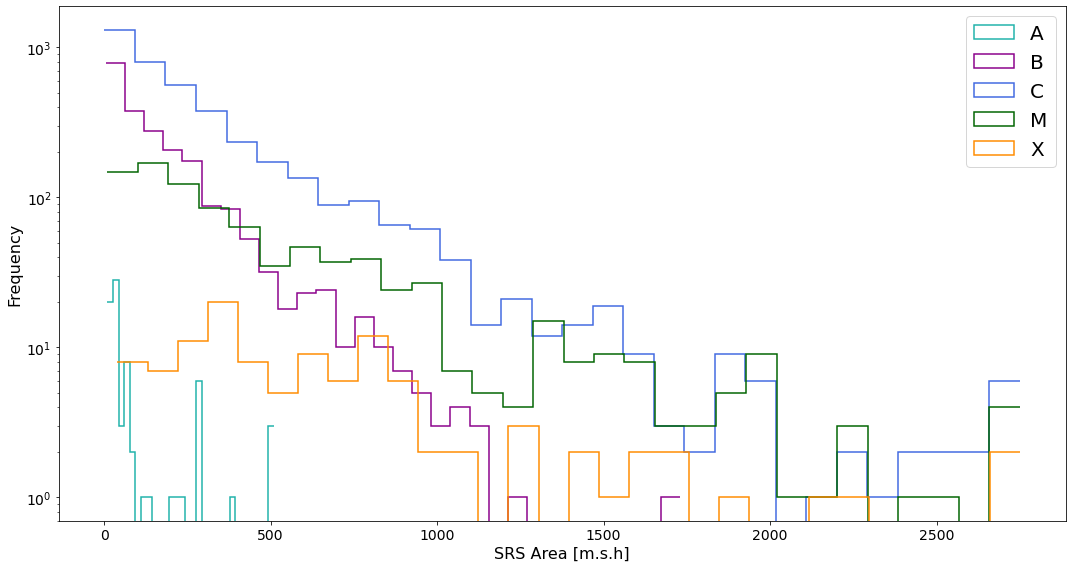

In [142]:
# Plotting sunspot area
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')

na, ba, pa = ax.hist(a.srs_area, 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax.hist(b.srs_area, 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax.hist(c.srs_area, 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax.hist(m.srs_area, 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax.hist(x.srs_area, 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

#ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('SRS Area [m.s.h]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc='best', fontsize=20)

plt.tight_layout()
#plt.savefig('srs_area_class.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### SMART areas

In [126]:
# Want data for flare GOES class and SRS area
dfsm = df[['goes_flux', 'smart_total_area']]

# Removing the rows containing any NaN values
dfsm = dfsm.dropna(how='any')

# Reindexing
dfsm = dfsm.reset_index(drop=True)

In [128]:
(dfsm == 0).astype(float).sum(axis=0)

goes_flux           0.0
smart_total_area    0.0
dtype: float64

In [129]:
# Splitting up the different GOES classes --> logging the values for this
dfsm.goes_flux = np.log10(dfsm.goes_flux)

In [130]:
# Need to split into [-8 to -7], [-7 to -6], [-6 to -5], [-5 to -4], [-4 to -3]
a2 = dfsm[ (dfsm['goes_flux'] >= -8.0) & (dfsm['goes_flux'] <= -7.0) ]  
b2 = dfsm[ (dfsm['goes_flux'] > -7.0) & (dfsm['goes_flux'] <= -6.0) ]  
c2 = dfsm[ (dfsm['goes_flux'] > -6.0) & (dfsm['goes_flux'] <= -5.0) ]  
m2 = dfsm[ (dfsm['goes_flux'] > -5.0) & (dfsm['goes_flux'] <= -4.0) ]  
x2 = dfsm[ (dfsm['goes_flux'] > -4.0) & (dfsm['goes_flux'] <= -3.0) ]  

In [210]:
a2cm = a2.smart_total_area.values*3.0E16
b2cm = b2.smart_total_area.values*3.0E16
c2cm = c2.smart_total_area.values*3.0E16
m2cm = m2.smart_total_area.values*3.0E16
x2cm = x2.smart_total_area.values*3.0E16

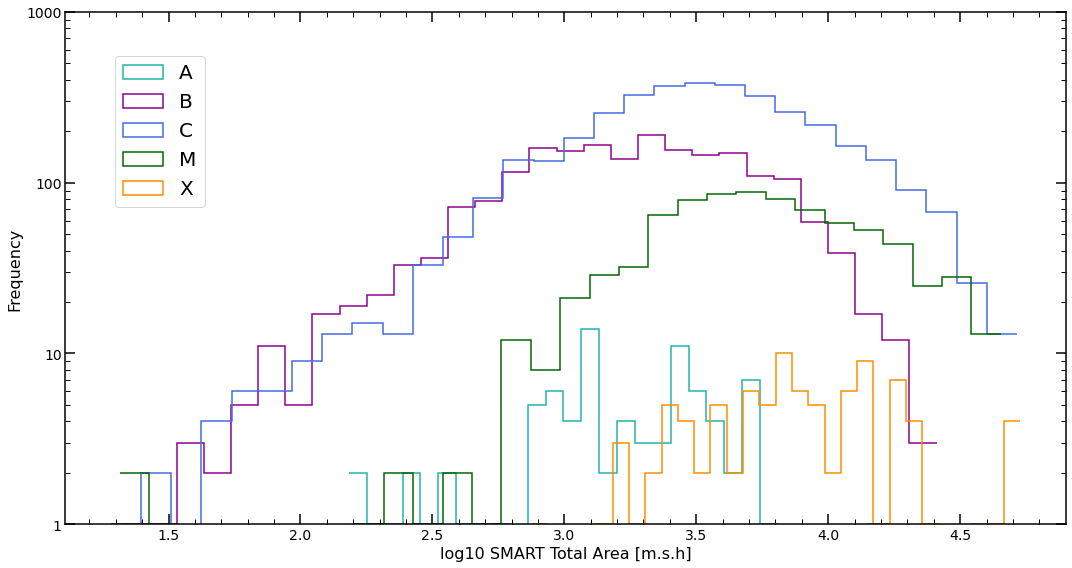

In [218]:
# Plotting sunspot area
fig2, ax2 = plt.subplots(figsize=(15, 8), facecolor='white')

na2, ba2, pa2 = ax2.hist(np.log10(a2.smart_total_area), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb2, bb2, pb2 = ax2.hist(np.log10(b2.smart_total_area), 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc2, bc2, pc2 = ax2.hist(np.log10(c2.smart_total_area), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm2, bm2, pm2 = ax2.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx2, bx2, px2 = ax2.hist(np.log10(x2.smart_total_area), 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa2[0].set_xy(pa2[0].get_xy()[1:-1])
pb2[0].set_xy(pb2[0].get_xy()[1:-1])
pc2[0].set_xy(pc2[0].get_xy()[1:-1])
pm2[0].set_xy(pm2[0].get_xy()[1:-1])
px2[0].set_xy(px2[0].get_xy()[1:-1])

#ax.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=16)
ax2.set_ylabel('Frequency', fontsize=16)
ax2.legend(loc=[0.05,0.62], fontsize=20)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax2.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_area_class.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

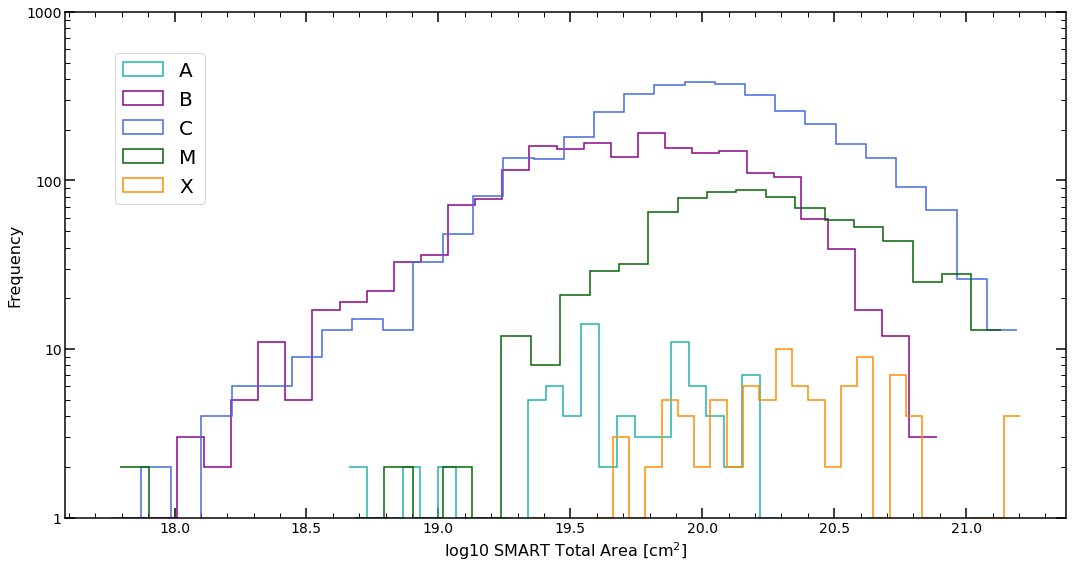

In [219]:
# Plotting sunspot area
fig2, ax2 = plt.subplots(figsize=(15, 8), facecolor='white')

na2, ba2, pa2 = ax2.hist(np.log10(a2cm), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb2, bb2, pb2 = ax2.hist(np.log10(b2cm), 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc2, bc2, pc2 = ax2.hist(np.log10(c2cm), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm2, bm2, pm2 = ax2.hist(np.log10(m2cm), 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx2, bx2, px2 = ax2.hist(np.log10(x2cm), 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa2[0].set_xy(pa2[0].get_xy()[1:-1])
pb2[0].set_xy(pb2[0].get_xy()[1:-1])
pc2[0].set_xy(pc2[0].get_xy()[1:-1])
pm2[0].set_xy(pm2[0].get_xy()[1:-1])
px2[0].set_xy(px2[0].get_xy()[1:-1])

#ax.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Area [cm$^{2}$]', fontsize=16)
ax2.set_ylabel('Frequency', fontsize=16)
ax2.legend(loc=[0.05,0.62], fontsize=20)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax2.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_acm_log.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

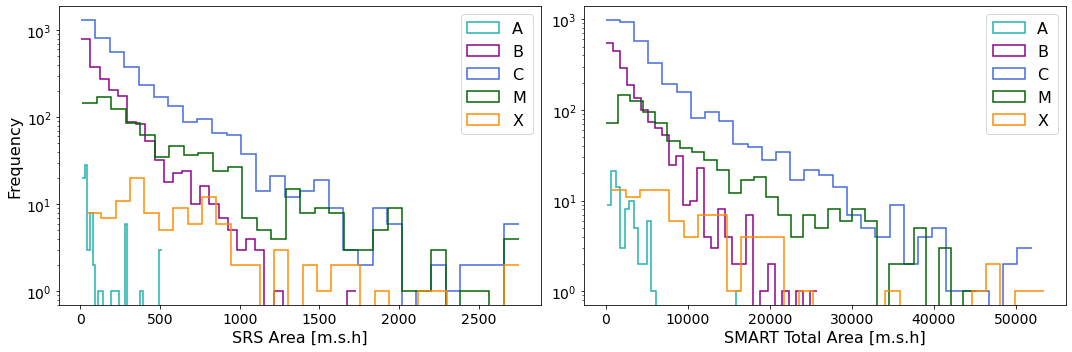

In [144]:
fig3, (ax3, ax4) = plt.subplots(1,2, figsize = (15,5), facecolor='white')

# SRS areas
na, ba, pa = ax3.hist(a.srs_area, 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax3.hist(b.srs_area, 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax3.hist(c.srs_area, 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax3.hist(m.srs_area, 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax3.hist(x.srs_area, 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_xlabel('SRS Area [m.s.h]', fontsize=16)
ax3.set_ylabel('Frequency', fontsize=16)
ax3.legend(loc='best', fontsize=16)

# SMART areas
na2, ba2, pa2 = ax4.hist(a2.smart_total_area, 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb2, bb2, pb2 = ax4.hist(b2.smart_total_area, 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc2, bc2, pc2 = ax4.hist(c2.smart_total_area, 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm2, bm2, pm2 = ax4.hist(m2.smart_total_area, 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx2, bx2, px2 = ax4.hist(x2.smart_total_area, 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa2[0].set_xy(pa2[0].get_xy()[1:-1])
pb2[0].set_xy(pb2[0].get_xy()[1:-1])
pc2[0].set_xy(pc2[0].get_xy()[1:-1])
pm2[0].set_xy(pm2[0].get_xy()[1:-1])
px2[0].set_xy(px2[0].get_xy()[1:-1])

ax4.set_yscale('log')
ax4.set_xlabel('SMART Total Area [m.s.h]', fontsize=16)
ax4.legend(loc='best', fontsize=16)

plt.tight_layout()
#plt.savefig('srs_smart_area.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

## CMEs